Task 4: Classification with Logistic Regression

Class Distribution (0: Malignant, 1: Benign):
Target
1    357
0    212
Name: count, dtype: int64
--------------------------------------------------
### 📊 Confusion Matrix
[[ 63   1]
 [  1 106]]


### 📋 Classification Report (Default Threshold 0.5)
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

--------------------------------------------------
### 📈 ROC-AUC Score: 0.9981
--------------------------------------------------


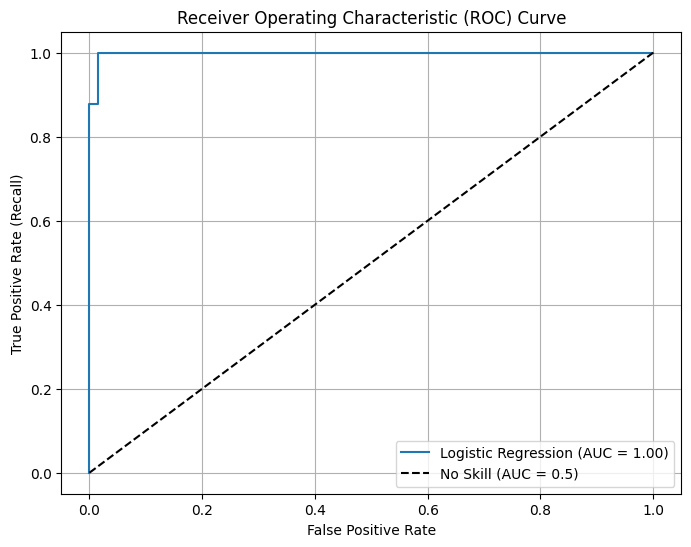

### 🎯 Threshold Tuning Example
Threshold | Precision | Recall | TP | FN
----------|-----------|--------|----|----
0.1      | 0.922     | 1.000| 107 | 0
0.3      | 0.973     | 1.000| 107 | 0
0.5      | 0.991     | 0.991| 106 | 1
0.7      | 0.990     | 0.944| 101 | 6
0.9      | 1.000     | 0.850| 91 | 16
--------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report

# 1. Choose a binary classification dataset (Breast Cancer Wisconsin)
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier handling (optional but good practice)
df_features = pd.DataFrame(X, columns=data.feature_names)
df_target = pd.Series(y, name='Target')

# Check class distribution (important for evaluating imbalance)
print("Class Distribution (0: Malignant, 1: Benign):")
print(df_target.value_counts())
print("-" * 50)

# 2. Train/test split and standardize features
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify ensures proportional class representation in splits

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' is a good choice for smaller datasets
model.fit(X_train_scaled, y_train)

# Predict class labels (default threshold is 0.5)
y_pred = model.predict(X_test_scaled)
# Predict probabilities for AUC and threshold tuning
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC

## Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("### 📊 Confusion Matrix")
print(conf_mat)
print("\n")

## Classification Report (Includes Precision and Recall)
print("### 📋 Classification Report (Default Threshold 0.5)")
print(classification_report(y_test, y_pred, target_names=data.target_names))
print("-" * 50)

## ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"### 📈 ROC-AUC Score: {roc_auc:.4f}")
print("-" * 50)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 5. Tune threshold (Example: Maximizing Recall while maintaining a minimum Precision)
# For medical diagnosis (like cancer), Recall (catching all cases) is often more important.
# Let's see the effect of various thresholds.
print("### 🎯 Threshold Tuning Example")

# Create a function to evaluate metrics at a custom threshold
def evaluate_at_threshold(y_true, y_prob, threshold):
    y_custom_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_custom_pred).ravel()
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    return prec, rec, tp, fn

thresholds_to_test = [0.1, 0.3, 0.5, 0.7, 0.9]
print("Threshold | Precision | Recall | TP | FN")
print("----------|-----------|--------|----|----")

for t in thresholds_to_test:
    prec, rec, tp, fn = evaluate_at_threshold(y_test, y_prob, t)
    print(f"{t:.1f}      | {prec:.3f}     | {rec:.3f}| {tp} | {fn}")
print("-" * 50)